#Actividad Individual 7 Módulo 5

#Ejercicios planteados

Con el fin de clasificar las distintas actividades que puede realizar una persona, se realizó un experimento a un grupo de 30 voluntarios dentro de un grupo de edad de 19 a 48 años. Cada persona realizó seis actividades (CAMINAR, CAMINAR POR LAS ESCALERAS, BAJAR LAS ESCALERAS, SENTARSE, DE PIE, RECOSTARSE) con un smartphone (Samsung Galaxy S II) conectado en su cintura. Usando el acelerómetro y giroscopio integrados en el smartphone, se tienen la siguiente data:

- Aceleración triaxial del acelerómetro (aceleración total) y la aceleración corporal estimada.
- Velocidad angular triaxial del giroscopio.
- Variables de dominio de tiempo y frecuencia.
- Su etiqueta de actividad.
- Un identificador del sujeto que realizó el experimento.

El conjunto de datos obtenido se ha dividido aleatoriamente en dos conjuntos (train y test), donde se seleccionó al 70% de los voluntarios para generar los datos de entrenamiento y al 30% los datos de la prueba.

Estos datos se encuentran en los siguientes links:

train: https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/train.csv

test: https://raw.githubusercontent.com/natjulian/Contribuci-n-Diplomado-Data-Science-UC-2021/main/Bases%20de%20datos%20Clases/Activity/test.csv

Para esta actividad, realice lo siguiente:

1. Cargue los set de datos de entrenamiento y prueba. ¿Cuáles son las dimensiones de estos set de datos?

In [37]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

import seaborn as sns
import matplotlib.pyplot as plt


train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

In [38]:
# búsqueda de valores null o NaN
test.isna().values.any(), train.isna().values.any(),test.isnull().values.any(), train.isnull().values.any()

(False, False, False, False)

In [40]:
# dimensionaes
print("Dimensión set de datos de entrenamiento: ", train.shape)
print("Dimensión set de datos de prueba: ", test.shape)

Dimensión set de datos de entrenamiento:  (7352, 563)
Dimensión set de datos de prueba:  (2947, 563)


2. Estudie la cantidad de registros que hay en cada actividad en el set de entrenamiento. Para esto, una opción es utilizar la función de pandas crosstab(index=columna, columns="count"). 

In [41]:
# cantidad de registros de la variable "Actividad"
registros_activity = pd.crosstab(index=train.Activity, columns="count")
registros_activity

col_0,count
Activity,
LAYING,1407
SITTING,1286
STANDING,1374
WALKING,1226
WALKING_DOWNSTAIRS,986
WALKING_UPSTAIRS,1073


¿Cómo se encuentran repartidas las Actividades? 

Se puede observar que el número de registros de las 6 actividades existentes, se encuentran repartidas de forma poco uniforme.

¿Existe algún desbalance en las categorías? (realice un gráfico que acompañe su análisis) Comente.

<Axes: ylabel='Activity'>

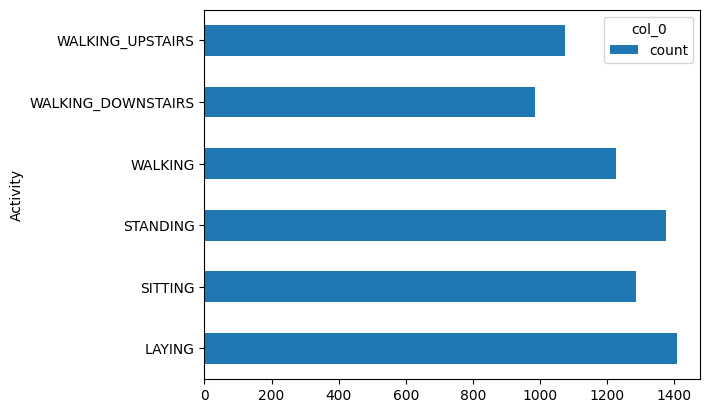

In [42]:
registros_activity.plot(kind='barh')

Como se comentó anteriormente, existe una clara diferencia entre la actividad mayor que registra 1407 registros y la actividad menor 986 registros, son 421 registros entre ellas.

3. Defina X_train y X_test como corresponda (omitiendo las variables que no corresponden a variables predictoras).

In [44]:
X_train = np.array(train.drop(columns=['Activity','subject'], axis=1))
X_test = np.array(test.drop(columns=['Activity','subject'], axis=1))

4. Estandarice el set de features de entrenamiento y prueba. Puede utilizar la función StandardScaler:

In [46]:
scaler = StandardScaler()
scaler.fit(X_train)

x_train_scaled = scaler.transform(X_train)
x_test_scaled = scaler.transform(X_test)

5. Defina y_train e y_test como corresponda (recuerde que debe estar
codificada numéricamente). Para recodificar un vector o columna y de
varias categorías a formato numérico puede utilizar:

In [49]:
y_train = np.array(train.Activity)
y_test = np.array(test.Activity)

encoder=LabelEncoder()
encoder.fit(y_train)
y_train_encoder=encoder.transform(y_train)
y_test_encoder=encoder.transform(y_test)

6. Utilice la función GridSearchCV para realizar 10 validaciones cruzadas con la lista de parámetros definida anteriormente. Determine la mejor combinación de parámetros y obtenga el modelo con dichos parámetros.


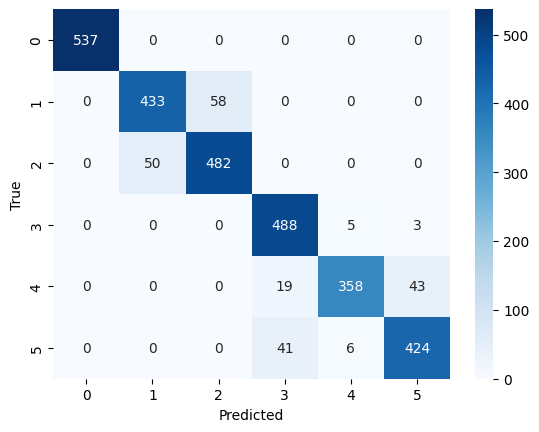

In [51]:
# Create a Random Forest classifier
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=0
)

# Train the classifier
rf.fit(x_train_scaled, y_train_encoder)

# Make predictions on the test set
y_pred = rf.predict(x_test_scaled)

# Compute the confusion matrix
cm = confusion_matrix(y_test_encoder, y_pred)

# Plot the confusion matrix
fig, ax = plt.subplots()
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d', ax=ax)
ax.set_xlabel('Predicted')
ax.set_ylabel('True')
plt.show()

In [53]:
param_grid = { 
    'n_estimators': [10],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

CV_rfc = GridSearchCV(estimator=rf, param_grid=param_grid, cv= 10)
CV_rfc.fit(x_train_scaled, y_train_encoder)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomFor

GridSearchCV(cv=10, estimator=RandomForestClassifier(random_state=0),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [10]})

In [54]:
best=CV_rfc.best_params_
best

{'criterion': 'entropy',
 'max_depth': 7,
 'max_features': 'auto',
 'n_estimators': 10}

In [57]:
rfc1=RandomForestClassifier(random_state=42, max_features=best['max_features'], n_estimators=best['n_estimators'], max_depth=best['max_depth'], criterion=best['criterion'])
rfc1.fit(x_train_scaled, y_train_encoder)

pred=rfc1.predict(x_test_scaled)
print("Accuracy for Random Forest on CV data: ",accuracy_score(y_test_encoder,pred))

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:424: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features='sqrt'` or remove this parameter as it is also the default value for RandomForestClassifiers and ExtraTreesClassifiers.
  warn(


Accuracy for Random Forest on CV data:  0.8985408890397014


7. ¿Cómo es la capacidad predictiva de este modelo en el set de prueba? Comente.

Por los resultados presentados, la capacidad predictora del modelo mediante el uso de la técnica de validación cruzada GridSearchCV en conjunto con el modelo RandomForestClassifier mejora notoriamente su desempeño. Quizas aumentando o modificando un hiperparametro puede ser un mucho mejor predictor.